# Question 3: Rolling Windows and Visualization

This question focuses on rolling window operations and time series visualization using disease surveillance data (monthly) and patient vital signs data (daily).

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_style('whitegrid')

# Create output directory
os.makedirs('output', exist_ok=True)

## Part 3.1: Load and Prepare Data

**Note:** 
- **Disease Surveillance**: 6 sites over 5 years (360 records total). This longer time period provides better opportunities to see seasonal patterns and trends.
- **Patient Vitals**: We'll aggregate by date (average across all patients) to create a daily time series for rolling window analysis. This handles missing data naturally.

In [2]:
# Load disease surveillance data (monthly)
disease_surveillance = pd.read_csv('data/disease_surveillance.csv')

# Load patient vitals data (daily) - for rolling window practice
patient_vitals = pd.read_csv('data/patient_vitals.csv')

print("Disease surveillance shape:", disease_surveillance.shape)
print("Patient vitals shape:", patient_vitals.shape)

# Convert datetime columns and set as index
disease_surveillance['date'] = pd.to_datetime(disease_surveillance['date'])
disease_surveillance = disease_surveillance.set_index('date')

patient_vitals['date'] = pd.to_datetime(patient_vitals['date'])
patient_vitals = patient_vitals.set_index('date')

# For rolling windows, work with a single patient's data or aggregate
# Let's aggregate patient vitals by date (average across patients)
# This creates a daily time series and handles missing data naturally
# Note: Sort the index for reliable rolling operations
patient_vitals_daily = patient_vitals.groupby('date').agg({
    'temperature': 'mean',
    'heart_rate': 'mean',
    'weight': 'mean'
})
patient_vitals_daily = patient_vitals_daily.sort_index()  # Sort index for rolling operations

print("\nDisease surveillance sample:")
print(disease_surveillance.head())
print("\nPatient vitals (aggregated daily) sample:")
print(patient_vitals_daily.head())
print(f"\nDaily aggregated records: {len(patient_vitals_daily)} (covers full year)")

Disease surveillance shape: (108, 5)
Patient vitals shape: (18250, 7)

Disease surveillance sample:
              site  cases  temperature  humidity
date                                            
2021-01-31  Site_A    105         58.5      67.4
2021-02-28  Site_A    121         70.6      52.1
2021-03-31  Site_A    133         83.1      42.3
2021-04-30  Site_A    140         97.6      38.7
2021-05-31  Site_A    126         81.1      46.8

Patient vitals (aggregated daily) sample:
            temperature  heart_rate     weight
date                                          
2023-01-01    98.667865       74.80  67.174295
2023-01-02    98.650347       75.52  67.117837
2023-01-03    98.734246       75.20  67.306747
2023-01-04    98.697151       75.04  67.250530
2023-01-05    98.601767       75.04  67.280478

Daily aggregated records: 365 (covers full year)


## Part 3.2: Basic Rolling Operations

**💡 TIP: Rolling Windows Create NaN Values**
Rolling window calculations create NaN (missing) values for the first N-1 observations, where N is the window size. For example, a 7-day rolling mean will have NaN for the first 6 days. This is expected and normal - there isn't enough data to fill the window yet!

**TODO: Apply rolling window operations**

In [ ]:
# Use patient_vitals_daily (daily aggregated data)

# TODO: Calculate 7-day rolling mean
temp_7d_rolling_mean = patient_vitals_daily['temperature'].rolling(window=7).mean()
# Note: Use consistent naming pattern like 'temperature_rolling_7d_mean'
# patient_vitals_daily['temperature_rolling_7d_mean'] = None  # 7-day rolling mean for temperature
# patient_vitals_daily['temperature_rolling_7d_std'] = None  # 7-day rolling standard deviation

# TODO: Calculate 30-day rolling statistics
# patient_vitals_daily['temperature_rolling_30d_mean'] = None  # 30-day rolling mean
# patient_vitals_daily['temperature_rolling_30d_min'] = None  # 30-day rolling minimum
# patient_vitals_daily['temperature_rolling_30d_max'] = None  # 30-day rolling maximum
temp_30d_rolling = patient_vitals_daily['temperature'].rolling(window=30)
temp_30d_rolling_mean = temp_30d_rolling.mean()
temp_30d_rolling_min = temp_30d_rolling.min()
temp_30d_rolling_max = temp_30d_rolling.max()
# TODO: Calculate rolling sum
# patient_vitals_daily['temperature_rolling_7d_sum'] = None  # 7-day rolling sum
temp_7d_rolling_sum = patient_vitals_daily['temperature'].rolling(window=7).sum()

# TODO: Use different window sizes
# Compare 7-day, 14-day, and 30-day rolling windows
# patient_vitals_daily['temperature_rolling_14d_mean'] = None  # 14-day rolling mean
temp_14d_rolling_mean = patient_vitals_daily['temperature'].rolling(window=14).mean()

# TODO: Create rolling statistics dataframe
# Create a DataFrame with rolling statistics for at least one metric (e.g., temperature or heart_rate)
# Include columns: date (index), original_value, rolling_7d_mean, rolling_7d_std, rolling_30d_mean, rolling_30d_min, rolling_30d_max
# Example structure:
rolling_stats = patient_vitals_daily[['temperature']].copy()
rolling_stats['rolling_7d_mean'] = temp_7d_rolling_mean
rolling_stats['rolling_7d_std'] = patient_vitals_daily['temperature'].rolling(window=7).std()
rolling_stats['rolling_30d_mean'] = temp_30d_rolling_mean
rolling_stats['rolling_30d_min'] = temp_30d_rolling_min
rolling_stats['rolling_30d_max'] = temp_30d_rolling_max
rolling_stats = rolling_stats.reset_index()  # Convert index to column if needed    {
# rolling_stats = patient_vitals_daily[['temperature']].copy()
# rolling_stats['rolling_7d_mean'] = patient_vitals_daily['temperature_rolling_7d_mean']
# rolling_stats['rolling_7d_std'] = patient_vitals_daily['temperature_rolling_7d_std']
# rolling_stats['rolling_30d_mean'] = patient_vitals_daily['temperature_rolling_30d_mean']
# rolling_stats['rolling_30d_min'] = patient_vitals_daily['temperature_rolling_30d_min']
# rolling_stats['rolling_30d_max'] = patient_vitals_daily['temperature_rolling_30d_max']
# rolling_stats = rolling_stats.reset_index()  # Convert index to column if needed

## Part 3.3: Advanced Rolling Operations

**TODO: Apply advanced rolling operations**

In [4]:
# TODO: Use centered rolling windows
# patient_vitals_daily['temperature_rolling_7d_centered'] = None  # Centered 7-day window

# TODO: Use expanding windows
# patient_vitals_daily['temperature_expanding_mean'] = None  # Expanding mean from start

# TODO: Calculate exponentially weighted moving averages
# patient_vitals_daily['temperature_ewm_span_7'] = None  # EWM with span=7
# patient_vitals_daily['temperature_ewm_span_30'] = None  # EWM with span=30
# patient_vitals_daily['temperature_ewm_alpha_0.3'] = None  # EWM with alpha=0.3

# TODO: Create custom rolling function
# Example: rolling range (max - min)
# Hint: The function should take a pandas Series and return a single value
# Use Series methods like .max() and .min() to calculate the range
def rolling_range(series):
    """Calculate rolling range (max - min)"""
    return None  # TODO: Implement - calculate max - min

# patient_vitals_daily['temperature_rolling_7d_range'] = None  # Apply custom function

# TODO: Handle minimum periods requirement
# patient_vitals_daily['temperature_rolling_7d_min_periods'] = None  # Rolling with min_periods=3

# TODO: Create comprehensive rolling comparison DataFrame
# Create a DataFrame comparing different rolling window methods
# Include columns: date, original_value, rolling_7d_mean, rolling_7d_std, rolling_30d_mean, rolling_30d_min, rolling_30d_max, ewm_span_7, expanding_mean
# Use the same metric (e.g., temperature) for all comparisons
# Example:
# rolling_comparison = pd.DataFrame({
#     'date': patient_vitals_daily.index,
#     'original_value': patient_vitals_daily['temperature'],
#     'rolling_7d_mean': patient_vitals_daily['temperature_rolling_7d_mean'],
#     'rolling_7d_std': patient_vitals_daily['temperature_rolling_7d_std'],
#     'rolling_30d_mean': patient_vitals_daily['temperature_rolling_30d_mean'],
#     'rolling_30d_min': patient_vitals_daily['temperature_rolling_30d_min'],
#     'rolling_30d_max': patient_vitals_daily['temperature_rolling_30d_max'],
#     'ewm_span_7': patient_vitals_daily['temperature_ewm_span_7'],
#     'expanding_mean': patient_vitals_daily['temperature_expanding_mean']
# })

# TODO: Save results as 'output/q3_rolling_analysis.csv'
# rolling_comparison.to_csv('output/q3_rolling_analysis.csv', index=False)

## Part 3.4: Trend Analysis Visualization

**TODO: Create trend analysis visualization**

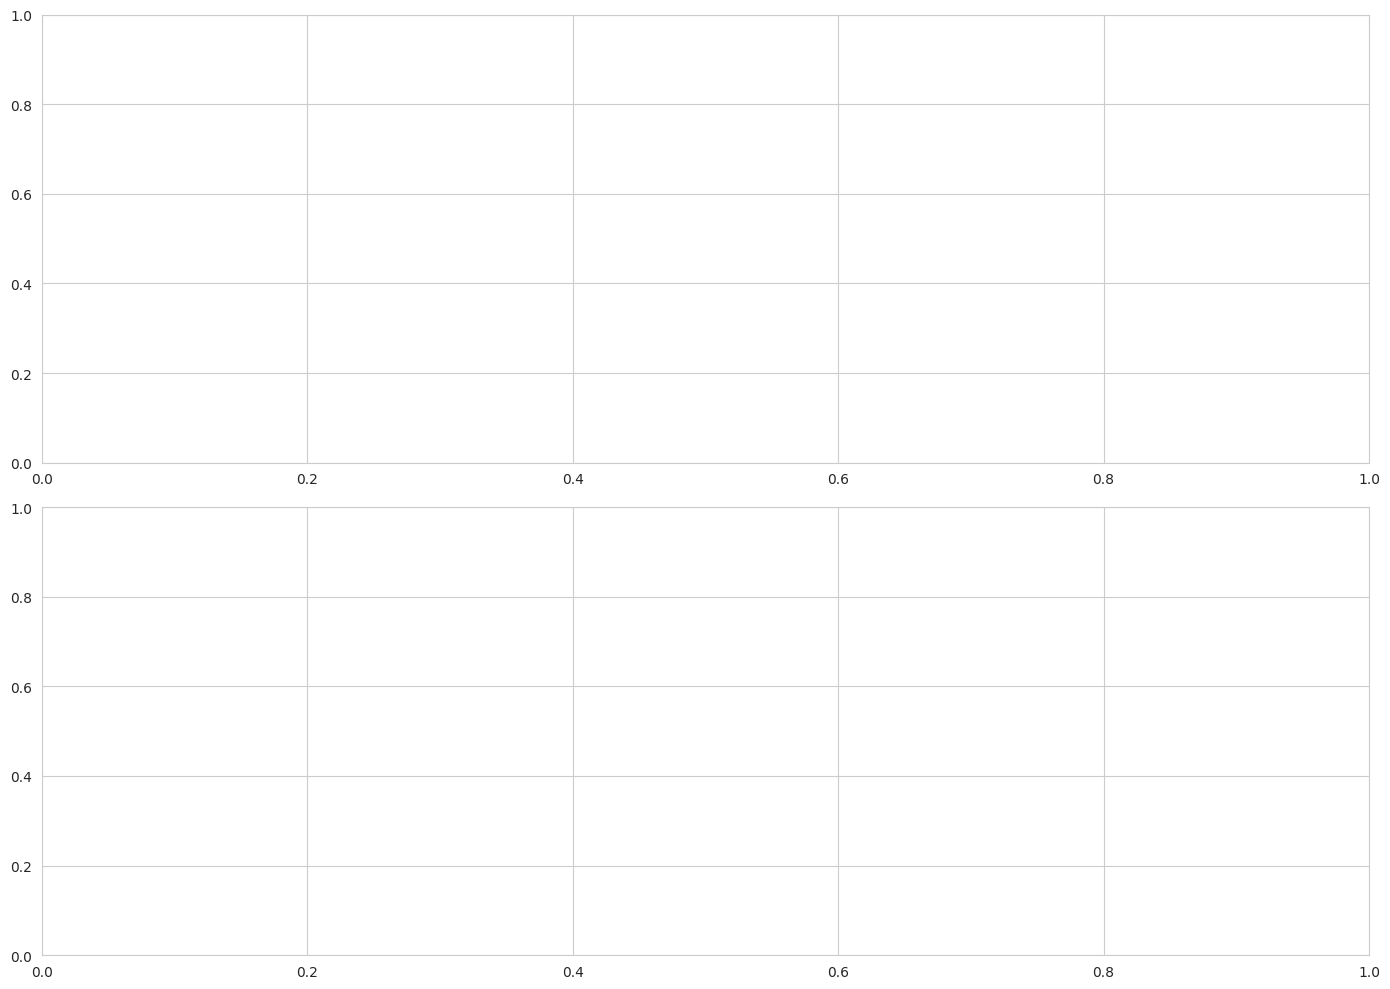

In [5]:
# Use patient_vitals_daily with rolling statistics from Part 3.2

# TODO: Create time series plot with original data
# Requirements for the plot:
# - Two subplots (2 rows, 1 column)
# - Top subplot: Original data + rolling mean + std bands + EWM
# - Bottom subplot: Comparison of different rolling methods (7-day, 30-day, EWM)
# - Include titles, axis labels, legends, and grid
# - Save as PNG with dpi=150
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# TODO: Plot original data (e.g., temperature or heart_rate)
# Select one metric (temperature or heart_rate) and plot it
# axes[0].plot(patient_vitals_daily.index, patient_vitals_daily['temperature'], alpha=0.5, label='Daily', color='gray')

# TODO: Add rolling mean overlay
# axes[0].plot(patient_vitals_daily.index, patient_vitals_daily['temperature_rolling_7d_mean'], linewidth=2, label='7-Day Rolling Mean', color='blue')

# TODO: Add rolling standard deviation bands
# Create upper and lower bounds: rolling_mean ± rolling_std
# upper_bound = patient_vitals_daily['temperature_rolling_7d_mean'] + patient_vitals_daily['temperature_rolling_7d_std']
# lower_bound = patient_vitals_daily['temperature_rolling_7d_mean'] - patient_vitals_daily['temperature_rolling_7d_std']
# axes[0].fill_between(patient_vitals_daily.index, lower_bound, upper_bound, alpha=0.2, color='blue', label='±1 Std Dev')

# TODO: Add exponentially weighted moving average
# axes[0].plot(patient_vitals_daily.index, patient_vitals_daily['temperature_ewm_span_7'], linewidth=2, label='7-Day EWM', color='red', linestyle='--')

# TODO: Customize colors and styling
# axes[0].set_title('Patient Temperature with Rolling Statistics', fontsize=14, fontweight='bold')
# axes[0].set_xlabel('Date')
# axes[0].set_ylabel('Temperature (°F)')
# axes[0].legend()
# axes[0].grid(True, alpha=0.3)
# axes[0].tick_params(axis='x', rotation=45)

# TODO: Create second subplot showing rolling statistics comparison
# axes[1].plot(patient_vitals_daily.index, patient_vitals_daily['temperature_rolling_7d_mean'], label='7-Day Rolling', color='blue')
# axes[1].plot(patient_vitals_daily.index, patient_vitals_daily['temperature_rolling_30d_mean'], label='30-Day Rolling', color='green')
# axes[1].plot(patient_vitals_daily.index, patient_vitals_daily['temperature_ewm_span_7'], label='EWM (span=7)', color='red', linestyle='--')
# axes[1].set_title('Rolling Window Comparison', fontsize=14, fontweight='bold')
# axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Value')
# axes[1].legend()
# axes[1].grid(True, alpha=0.3)
# axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# TODO: Save the plot as 'output/q3_trend_analysis.png'
# Requirements: PNG format, dpi=150, bbox_inches='tight'
# plt.savefig('output/q3_trend_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## Part 3.5: Comprehensive Visualization

**TODO: Create comprehensive multi-variable time series visualization**

**Note:** In Part 3.2, you created `temperature_rolling_7d_mean` for the `temperature` column. For this visualization, you'll need to create separate rolling means for `heart_rate` and `weight` columns as well. Use consistent naming convention (e.g., `heart_rate_rolling_7d_mean` and `weight_rolling_7d_mean`).

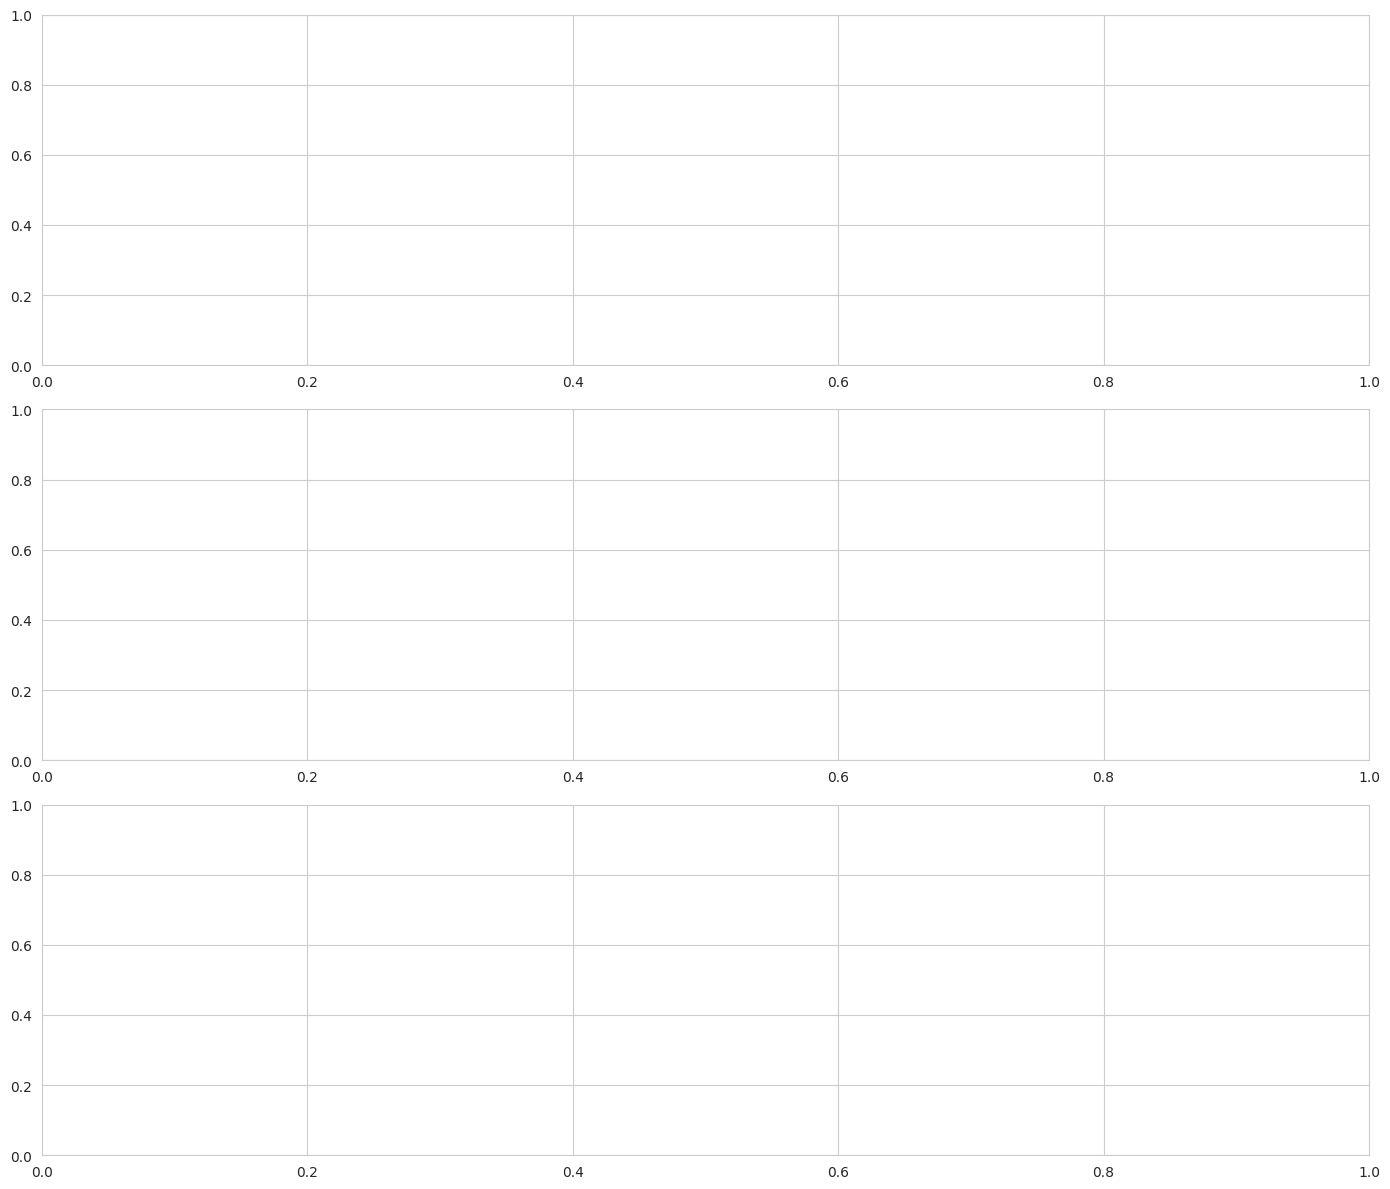

In [6]:
# TODO: Create visualization with multiple variables
# Requirements for the plot:
# - Three subplots (3 rows, 1 column) showing temperature, heart_rate, and weight
# - Each subplot should show original data + rolling mean (7-day or 30-day)
# - Include titles, axis labels, legends, and grid for each subplot
# - Save as PNG with dpi=150
# Use patient_vitals_daily DataFrame with multiple columns (temperature, heart_rate, weight)

# TODO: Calculate rolling means for heart_rate and weight (you already have temperature_rolling_7d_mean for temperature)
# Note: Use consistent naming convention - follow the same pattern as 'temperature_rolling_7d_mean' but make it metric-specific
# For example: 'heart_rate_rolling_7d_mean' and 'weight_rolling_7d_mean'
# patient_vitals_daily['heart_rate_rolling_7d_mean'] = None  # Calculate 7-day rolling mean for heart_rate
# patient_vitals_daily['weight_rolling_7d_mean'] = None  # Calculate 7-day rolling mean for weight

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# TODO: Plot temperature with rolling mean
# Top subplot: temperature
# Use the temperature_rolling_7d_mean you created in Part 3.2
# axes[0].plot(patient_vitals_daily.index, patient_vitals_daily['temperature'], alpha=0.5, label='Daily Temperature', color='gray')
# axes[0].plot(patient_vitals_daily.index, patient_vitals_daily['temperature_rolling_7d_mean'], linewidth=2, label='7-Day Rolling Mean', color='blue')
# axes[0].set_title('Patient Temperature Over Time', fontsize=12, fontweight='bold')
# axes[0].set_xlabel('Date')
# axes[0].set_ylabel('Temperature (°F)')
# axes[0].legend()
# axes[0].grid(True, alpha=0.3)
# axes[0].tick_params(axis='x', rotation=45)

# TODO: Plot heart rate with rolling mean
# Middle subplot: heart_rate
# Use the heart_rate_rolling_7d_mean you calculated above
# axes[1].plot(patient_vitals_daily.index, patient_vitals_daily['heart_rate'], alpha=0.5, label='Daily Heart Rate', color='gray')
# axes[1].plot(patient_vitals_daily.index, patient_vitals_daily['heart_rate_rolling_7d_mean'], linewidth=2, label='7-Day Rolling Mean', color='green')
# axes[1].set_title('Patient Heart Rate Over Time', fontsize=12, fontweight='bold')
# axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Heart Rate (bpm)')
# axes[1].legend()
# axes[1].grid(True, alpha=0.3)
# axes[1].tick_params(axis='x', rotation=45)

# TODO: Plot weight with rolling mean
# Bottom subplot: weight
# Use the weight_rolling_7d_mean you calculated above
# axes[2].plot(patient_vitals_daily.index, patient_vitals_daily['weight'], alpha=0.5, label='Daily Weight', color='gray')
# axes[2].plot(patient_vitals_daily.index, patient_vitals_daily['weight_rolling_7d_mean'], linewidth=2, label='7-Day Rolling Mean', color='purple')
# axes[2].set_title('Patient Weight Over Time', fontsize=12, fontweight='bold')
# axes[2].set_xlabel('Date')
# axes[2].set_ylabel('Weight (kg)')
# axes[2].legend()
# axes[2].grid(True, alpha=0.3)
# axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

# TODO: Save the plot as 'output/q3_visualization.png'
# Requirements: PNG format, dpi=150, bbox_inches='tight'
# plt.savefig('output/q3_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q3_rolling_analysis.csv` - rolling window analysis
- [ ] `output/q3_trend_analysis.png` - trend analysis visualization
- [ ] `output/q3_visualization.png` - comprehensive time series plot
